In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import numpy as np

def visualize(df1, df2):
    # Remove the ".pdf" extension from filenames in both dataframes
    df1['filename'] = df1['filename'].str.replace('.pdf', '', regex=False)
    df2['filename'] = df2['filename'].str.replace('.pdf', '', regex=False)

    # Merge on filename to compare actual and predicted labels
    comparison = df1.merge(df2, on="filename")
    
    # Map labels to binary values: YES -> 1, NO -> 0
    y_true = comparison["actual_label"].map({"YES": 1, "NO": 0})
    y_pred = comparison["predicted_label"].map({"YES": 1, "NO": 0})

    # Compute evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)


    # Visualize the confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(conf_matrix, cmap='Blues')
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")

    # Set tick marks and labels (assuming binary classification: NO=0, YES=1)
    ax.set_xticks(np.arange(2))
    ax.set_yticks(np.arange(2))
    ax.set_xticklabels(["NO", "YES"])
    ax.set_yticklabels(["NO", "YES"])

    # Annotate the confusion matrix with counts
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

    fig.colorbar(im, ax=ax)
    plt.show()


In [2]:
truth_path= r"../Final/csv_data/new_test_actual.csv"
truth = pd.read_csv(truth_path)

Accuracy: 0.70
Precision: 0.50
Recall: 0.83
F1 Score: 0.62


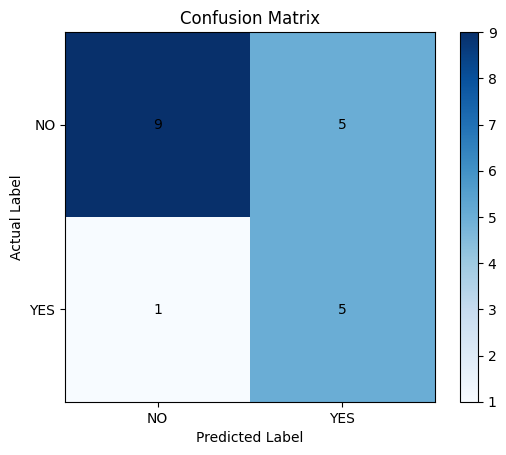

In [ ]:
# 20
pred_path_40 = r"../Final/result/test_predictions_20.csv" 
pred_40 = pd.read_csv(pred_path_40)
visualize(truth, pred_40)

Accuracy: 0.80
Precision: 0.60
Recall: 1.00
F1 Score: 0.75


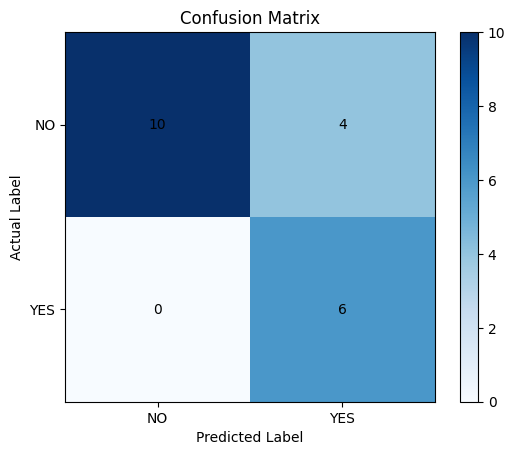

In [ ]:
# 40
pred_path_40 = r"../Final/csv_data/test_predictions_40.csv" 
pred_40 = pd.read_csv(pred_path_40)
visualize(truth, pred_40)